## **Thu thập dữ liệu**

#### Chủ đề của dữ liệu là gì?
  * **Chủ đề:** Bộ dữ liệu chứa thông tin chi tiết về các bài hát trên nền tảng ứng dụng **Spotify**, bao gồm các đặc trưng âm thanh như **danceability** (độ có thể nhảy), **energy** (năng lượng), **key** (điệu), và **popularity** (độ phổ biến).
  * **Bối cảnh:** Dữ liệu đại diện cho các bài hát thuộc 125 thể loại nhạc khác nhau, phản ánh đặc điểm âm nhạc và mức độ phổ biến của chúng trên nền tảng ứng dụng Spotify.

#### Nguồn gốc của dữ liệu là ở đâu?
  * **Nền tảng:** Hugging Face.
  * **URL:** [Hugging Face](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)
  * **Tác giả:** Maharshi Pandya.
  * **Ngày công bố:** Bộ dữ liệu được cập nhật khoảng 2 năm trước (theo thông tin commit trên Hugging Face).

#### Dữ liệu này có được cấp phép để bạn sử dụng không?
  * **Giấy phép:** Trên Hugging Face, dataset được ghi giấy phép là **BSD** $\to$ Điều này cho phép sử dụng cho mục đích giáo dục và nghiên cứu.
  * **Cách sử dụng:** Bạn được phép sử dụng để phân tích và xây dựng mô hình học máy.

#### Phương pháp để thu thập dữ liệu này là gì?
  * **Phương pháp:** Dữ liệu được thu thập và làm sạch bằng cách sử dụng **Spotify Web API** thông qua Python. Tác giả đã truy xuất các tính năng âm thanh cho các bài hát từ nhiều thể loại khác nhau.
  * **Đối tượng mẫu:** Bao gồm khoảng 114,000 bài hát thuộc 125 thể loại khác nhau.
  * **Quy trình:** Dữ liệu không phải là ngẫu nhiên hoàn toàn mà được truy vấn theo danh sách các thể loại nhạc để đảm bảo sự đa dạng và cân bằng giữa các lớp.
  * **Hạn chế:** Vì dữ liệu được lấy qua API tại một thời điểm nhất định (năm 2022), chỉ số độ phổ biến mang tính thời điểm và có thể đã thay đổi so với hiện tại.

#### Lý do để nhóm chọn dataset này là gì?
  * **Hứng thú:** Nhóm quan tâm đến lĩnh vực âm nhạc và muốn tìm hiểu các yếu tố kỹ thuật như nhịp điệu nhanh hay chậm, bài hát buồn hay vui,... ảnh hưởng thế nào đến sự phổ biến của một bài hát.
  * **Tiềm năng phân tích:** Dataset có kích thước đủ lớn (hơn 100 nghìn dòng, 21 cột), chứa cả dữ liệu số và phân loại, rất phù hợp để đặt câu hỏi về phân lớp (Classification - ví dụ: dự đoán thể loại nhạc) hoặc hồi quy (Regression - ví dụ: dự đoán độ phổ biến).

## **Khám phá dữ liệu**

### **Khai báo thư viện**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### **Tổng quan về dữ liệu**

#### Dữ liệu có bao nhiêu dòng, bao nhiêu cột và kiểu dữ liệu của từng cột là gì? 

In [2]:
# Đọc dữ liệu
df = pd.read_csv('../data/raw/spotify_dataset.csv')

# Xem 5 dòng đầu tiên
display(df.head())

# Tổng quan kích thước (Rows, Columns)
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")

# Kiểm tra kiểu dữ liệu và bộ nhớ
print("\nThông tin về kiểu dữ liệu")
df.info()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Số dòng: 114000
Số cột: 21

Thông tin về kiểu dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalne

#### Các dòng của dữ liệu có bị trùng lặp hay không?

In [3]:
# Kiểm tra dòng trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {num_duplicates}")

Số dòng bị trùng lặp: 0


#### Dữ liệu có bị thiếu hay không? 

In [4]:
# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
print("\n--- Số lượng giá trị bị thiếu (Null) ---")
print(missing_values[missing_values > 0]) # Chỉ in các cột có dữ liệu thiếu


--- Số lượng giá trị bị thiếu (Null) ---
artists       1
album_name    1
track_name    1
dtype: int64


#### Từng cột có ý nghĩa gì?

* **track_id:** ID duy nhất của bài hát trên Spotify.
* **artists:** Tên nghệ sĩ biểu diễn.
* **album_name:** Tên album chứa bài hát.
* **track_name:** Tên bài hát.
* **popularity:** Điểm phổ biến (0-100), càng cao càng nổi tiếng.
* **duration_ms:** Độ dài bài hát tính bằng mili-giây.
* **explicit:** Đánh dấu bài hát có nội dung nhạy cảm hay không.
* **danceability:** Độ thích hợp để nhảy (0.0 - 1.0).
* **energy:** Mức năng lượng/cường độ của bài hát (0.0 - 1.0).
* **key:** Tông nhạc.
* **loudness:** Độ to trung bình (dB).
* **mode:** Điệu thức (1 = Major/Trưởng, 0 = Minor/Thứ).
* **speechiness:** Mức độ chứa từ ngữ.
* **acousticness:** Độ mộc của bài hát.
* **instrumentalness:** Dự đoán bài hát không có lời.
* **liveness:** Xác suất bài hát được thu âm trực tiếp.
* **valence:** Cảm xúc tích cực của bài hát.
* **tempo:** Nhịp độ.
* **time_signature:** Số chỉ nhịp.
* **track_genre:** Thể loại nhạc.

#### Những cột nào có liên quan đến phân tích tiềm năng?

Hầu hết các cột đều quan trọng. Đặc biệt là các đặc trưng âm thanh (**danceability**, **energy**, **valence**, **tempo**...) để chạy mô hình, và **track_genre**, **popularity** làm biến mục tiêu.

#### Có cột nào cần được bỏ đi không? Tại sao?

Cần xóa cột **Unnamed** (thường là chỉ số index thừa từ file CSV cũ) và **track_id** (không có giá trị phân tích mô hình, chỉ dùng để định danh lúc đầu).

#### Có cột nào có kiểu dữ liệu không phù hợp không?
Thường bộ dữ liệu này khá chuẩn. Tuy nhiên, cần kiểm tra cột **explicit**. Đôi khi pandas đọc nó là *Object* (chuỗi "True"/ hoặc "False") thay vì *Boolean*.


#### Những cột nào cần chuyển đổi loại?

* Nếu **explicit** đang là object, cần chuyển sang boolean hoặc int (1/0).
* **duration_ms** có thể chuyển đổi từ mili-giây sang phút để dễ hình dung hơn khi phân tích, dù không bắt buộc về mặt kỹ thuật.

### **Phân tích các cột số**

In [5]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Loại bỏ cột index nếu có
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

numerical_cols

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

#### Hình dạng phân phối của từng đặc trưng số là gì?

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


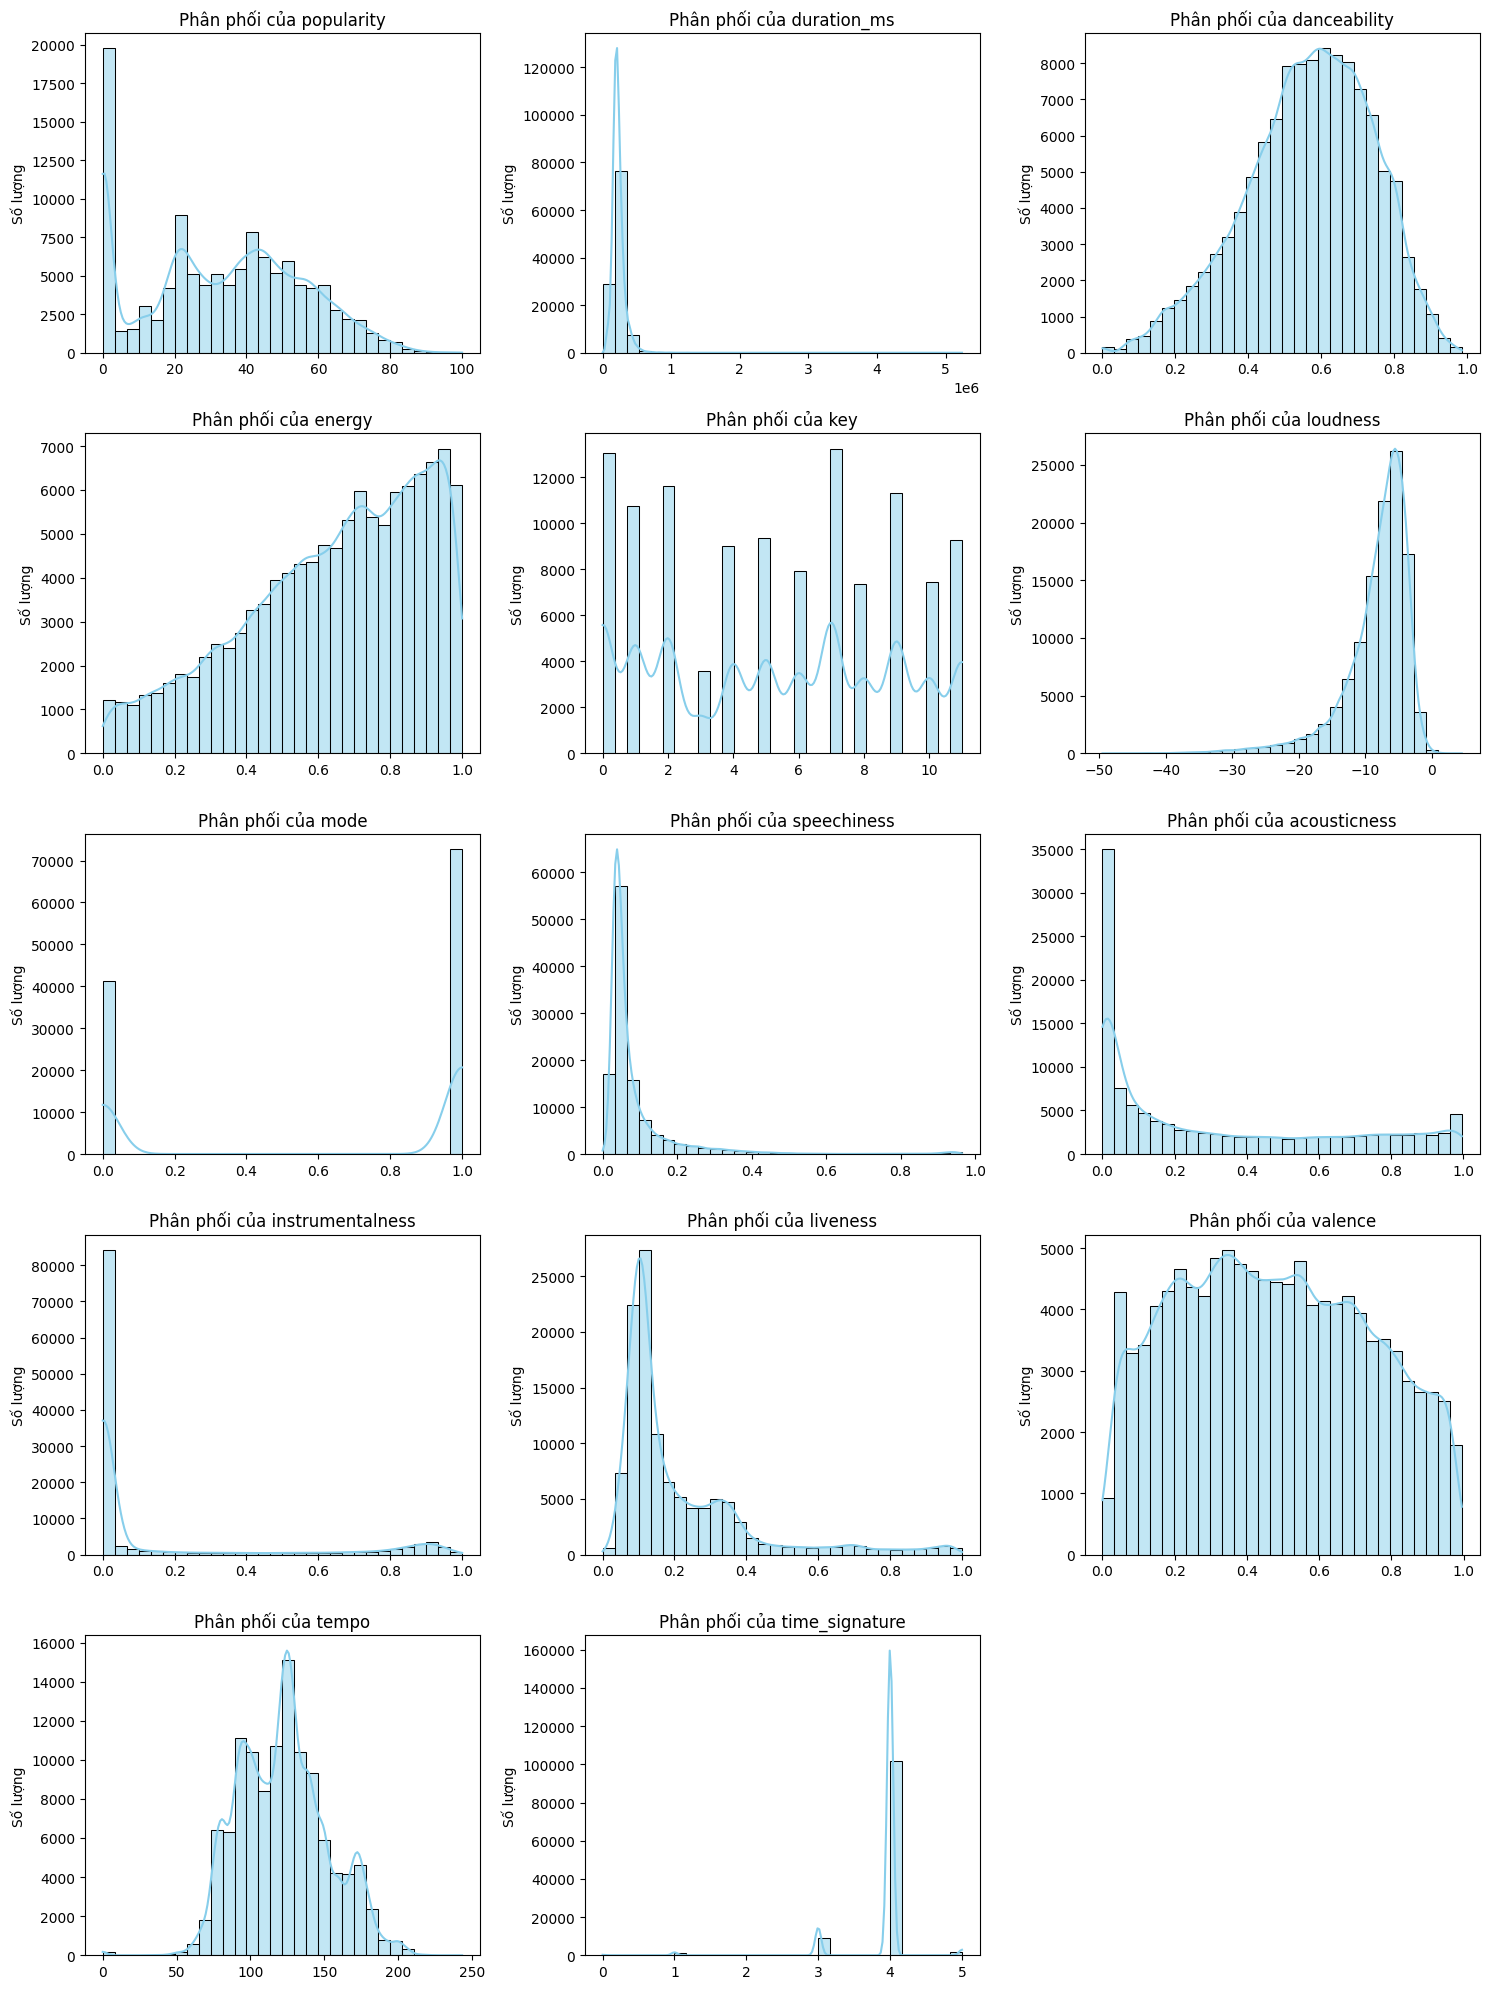

In [6]:
# Thống kê mô tả (Mean, Median, Std, Min, Max)
display(df.describe())

# Tính toán kích thước lưới biểu đồ
num_plots = len(numerical_cols)
cols = 3  # Số biểu đồ trên 1 hàng
rows = math.ceil(num_plots / cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Phân phối Hai đỉnh: **mode**
* Phân phối Rời rạc: **key**
* Phân phối Chuẩn: **danceability**, **valence** và **tempo**
* Phân phối Lệch:
    * Lệch phải: **loudness**, **energy** và **time_signature**
    * Lệch trái: **popularity**, **duration_ms**, **speechiness**, **acousticness**, **instrumentalness** và **liveness**

## **Phân tích các cột phân loại**

### **Xác định các cột phân loại**

- Các thuộc tính phân loại trong tập dữ liệu:
    - **Thuộc tính Nominal:** artists, album_name, track_name, track_genre.
    - **Thuộc tính Ordinal:** key, time_signature
    - **Thuộc tính Binary:** explicit, mode.

In [7]:
norminal_cols = ['artists', 'album_name', 'track_name', 'track_genre']
ordinal_cols = ['key', 'time_signature']
binary_cols = ['explicit', 'mode']

print("="*10 + "Các cột phân loại" + "="*10)
print("Các cột Nominal:", norminal_cols)
print("Các cột Ordinal", ordinal_cols)
print("Các cột Binary:", binary_cols)

==========Các cột phân loại==========
Các cột Nominal: ['artists', 'album_name', 'track_name', 'track_genre']
Các cột Ordinal ['key', 'time_signature']
Các cột Binary: ['explicit', 'mode']


### **Thống kê cơ bản**

#### **Cột Nominal**

In [8]:
print("="*10 + "Thống kê các cột Nominal" + "="*10)
for col in norminal_cols:
    unique_values = df[col].value_counts()
    print(f"Cột: {col}")
    print(f"    Số lượng giá trị duy nhất: {df[col].nunique()}")
    print(f"    Top 5 giá trị phổ biến nhất:")
    for value, count in unique_values.head(5).items():
        print(f"        {value}: {count} | Tỷ lệ: {count / len(df) * 100:.2f}%")

==========Thống kê các cột Nominal==========
Cột: artists
    Số lượng giá trị duy nhất: 31437
    Top 5 giá trị phổ biến nhất:
        The Beatles: 279 | Tỷ lệ: 0.24%
        George Jones: 271 | Tỷ lệ: 0.24%
        Stevie Wonder: 236 | Tỷ lệ: 0.21%
        Linkin Park: 224 | Tỷ lệ: 0.20%
        Ella Fitzgerald: 222 | Tỷ lệ: 0.19%
Cột: album_name
    Số lượng giá trị duy nhất: 46589
    Top 5 giá trị phổ biến nhất:
        Alternative Christmas 2022: 195 | Tỷ lệ: 0.17%
        Feliz Cumpleaños con Perreo: 184 | Tỷ lệ: 0.16%
        Metal: 143 | Tỷ lệ: 0.13%
        Halloween con perreito: 123 | Tỷ lệ: 0.11%
        Halloween Party 2022: 115 | Tỷ lệ: 0.10%
Cột: track_name
    Số lượng giá trị duy nhất: 73608
    Top 5 giá trị phổ biến nhất:
        Run Rudolph Run: 151 | Tỷ lệ: 0.13%
        Halloween: 88 | Tỷ lệ: 0.08%
        Frosty The Snowman: 81 | Tỷ lệ: 0.07%
        Little Saint Nick - 1991 Remix: 76 | Tỷ lệ: 0.07%
        Last Last: 75 | Tỷ lệ: 0.07%
Cột: track_genre
    Số lư

#### **Cột Ordinal**

In [9]:
print("="*10 + "Thống kê các cột Ordinal" + "="*10)
for col in ordinal_cols:
    unique_values = df[col].value_counts().sort_index()  # Sắp theo thứ tự ordinal
    print(f"Cột: {col}")
    print(f"    Số lượng giá trị duy nhất: {df[col].nunique()}")
    print(f"    Số lượng và tỷ lệ của từng giá trị:")
    for value, count in unique_values.items():
        print(f"        {value}: {count} | Tỷ lệ: {count / len(df) * 100:.2f}%")

==========Thống kê các cột Ordinal==========
Cột: key
    Số lượng giá trị duy nhất: 12
    Số lượng và tỷ lệ của từng giá trị:
        0: 13061 | Tỷ lệ: 11.46%
        1: 10772 | Tỷ lệ: 9.45%
        2: 11644 | Tỷ lệ: 10.21%
        3: 3570 | Tỷ lệ: 3.13%
        4: 9008 | Tỷ lệ: 7.90%
        5: 9368 | Tỷ lệ: 8.22%
        6: 7921 | Tỷ lệ: 6.95%
        7: 13245 | Tỷ lệ: 11.62%
        8: 7360 | Tỷ lệ: 6.46%
        9: 11313 | Tỷ lệ: 9.92%
        10: 7456 | Tỷ lệ: 6.54%
        11: 9282 | Tỷ lệ: 8.14%
Cột: time_signature
    Số lượng giá trị duy nhất: 5
    Số lượng và tỷ lệ của từng giá trị:
        0: 163 | Tỷ lệ: 0.14%
        1: 973 | Tỷ lệ: 0.85%
        3: 9195 | Tỷ lệ: 8.07%
        4: 101843 | Tỷ lệ: 89.34%
        5: 1826 | Tỷ lệ: 1.60%


#### **Cột Binary**

In [10]:
print("="*10 + "Thống kê các cột Binary" + "="*10)
for col in binary_cols:
    unique_values = df[col].value_counts()
    print(f"Cột: {col}")
    print(f"    Số lượng và tỷ lệ của từng giá trị:")
    for value, count in unique_values.items():
        print(f"        {value}: {count} | Tỷ lệ: {count / len(df) * 100:.2f}%")

==========Thống kê các cột Binary==========
Cột: explicit
    Số lượng và tỷ lệ của từng giá trị:
        False: 104253 | Tỷ lệ: 91.45%
        True: 9747 | Tỷ lệ: 8.55%
Cột: mode
    Số lượng và tỷ lệ của từng giá trị:
        1: 72681 | Tỷ lệ: 63.76%
        0: 41319 | Tỷ lệ: 36.24%


### **Trực quan hóa**

#### **Cột Norminal**

##### **Tỷ lệ nhóm hàng đầu (Top 20) và nhóm còn lại** 

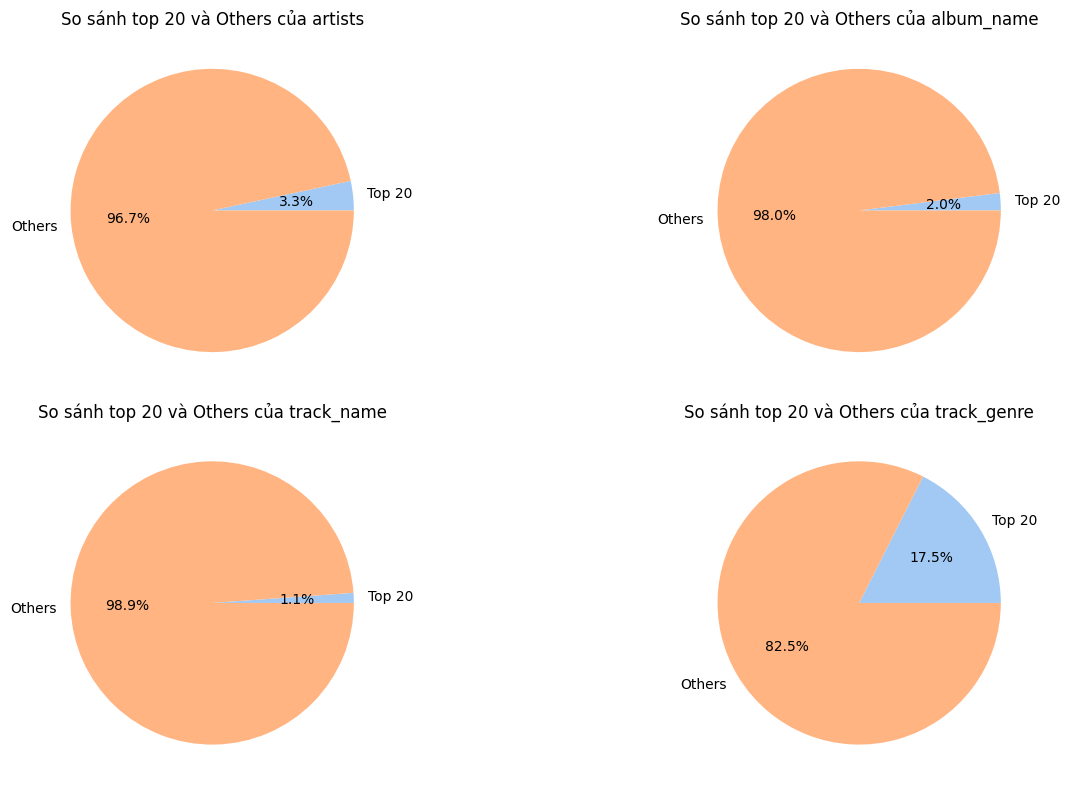

In [11]:
# Tính toán kích thước lưới biểu đồ
nor_plots = len(norminal_cols)
nor_cols = 2  # Số biểu đồ trên 1 hàng
nor_rows = math.ceil(nor_plots / nor_cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(nor_rows, nor_cols, figsize=(15, 4 * nor_rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(norminal_cols):
    unique_values = df[col].value_counts()
    top_20_count = unique_values.head(20).sum()
    others_count = unique_values.iloc[20:].sum()
    if others_count > 0:
        top_20_with_others = pd.concat([pd.Series({'Top 20': top_20_count}), pd.Series({'Others': others_count})])
    else:
        top_20_with_others = top_20_count
    axes[i].pie(top_20_with_others.values, labels=top_20_with_others.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

    axes[i].set_title(f'So sánh top 20 và Others của {col}')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Nhận xét**
    - Nhìn chung, các dữ liệu nằm ngoài Top 20 (nhóm Others) chiếm tỷ trọng áp đảo (từ 82.5% đến 98.9%).
    - Điều này cho thấy dữ liệu có độ phân tán lớn và độ đa dạng cao, không bị chi phối cục bộ bởi một nhóm nhỏ các giá trị đứng đầu.

##### **Phân phối của nhóm hàng đầu (Top 20)** 

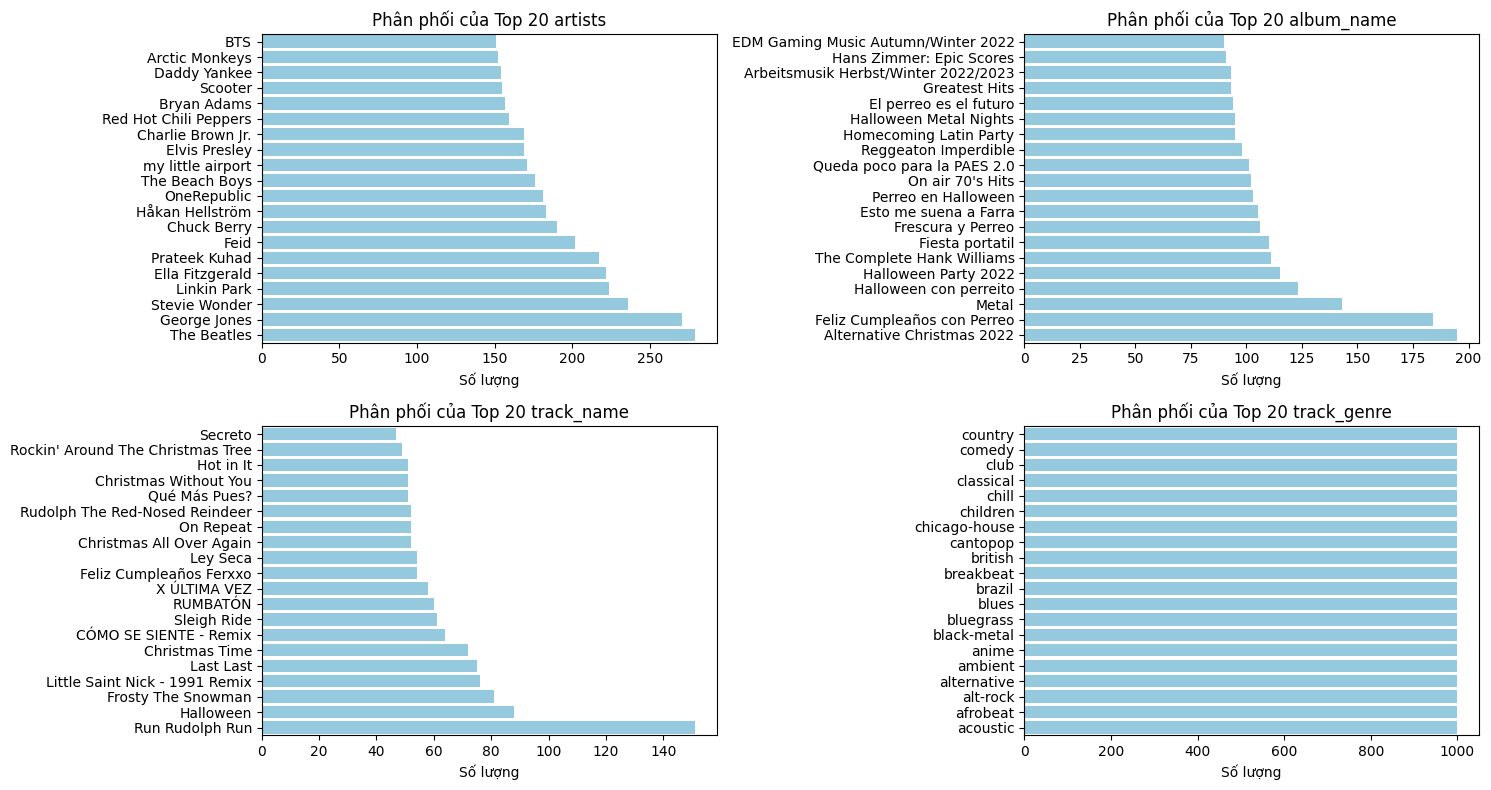

In [12]:
# Tính toán kích thước lưới biểu đồ
nor_plots = len(norminal_cols)
nor_cols = 2  # Số biểu đồ trên 1 hàng
nor_rows = math.ceil(nor_plots / nor_cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(nor_rows, nor_cols, figsize=(15, 4 * nor_rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(norminal_cols):
    unique_values = df[col].value_counts()
    top_20 = unique_values.head(20)
    sns.barplot(y=top_20.index, x=top_20.values, ax=axes[i], color='skyblue')
    axes[i].invert_yaxis() 

    axes[i].set_title(f'Phân phối của Top 20 {col}')
    axes[i].set_xlabel('Số lượng')
    axes[i].set_ylabel('')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- **Nhận xét:**
    - Thuộc tính `artists`: Khoảng biến thiên trong Top 20 khá rộng (từ ~150 đến ~280), cho thấy ngay cả trong nhóm phổ biến nhất, mức độ đóng góp dữ liệu của các nghệ sĩ cũng không đồng nhất.
    - Thuộc tính `track_name` và `album_name`: Nhóm phổ biến nhất chịu ảnh hưởng mạnh bởi yếu tố mùa vụ, với các từ khóa liên quan đến "Christmas" và "Halloween" chiếm tỷ trọng áp đảo tại các vị trí dẫn đầu.
    - Thuộc tính `track_genre`: Nhóm phổ biến đạt trạng thái cân bằng hoàn hảo với tần suất cố định (1000) cho mỗi thể loại

### **Cột Ordinal**

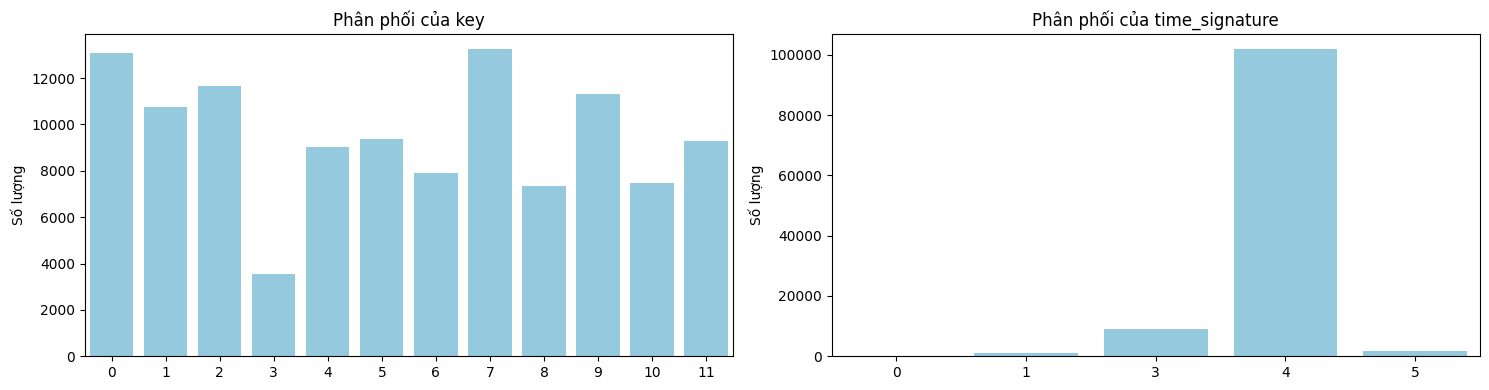

In [13]:
# Tính toán kích thước lưới biểu đồ
ord_plots = len(ordinal_cols)
ord_cols = 2  # Số biểu đồ trên 1 hàng
ord_rows = math.ceil(ord_plots / ord_cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(ord_rows, ord_cols, figsize=(15, 4 * ord_rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(ordinal_cols):
    unique_values = df[col].value_counts().sort_index()  # Sắp theo thứ tự ordinal
    sns.barplot(y=unique_values.values, x=unique_values.index, ax=axes[i], color='skyblue')
    
    
    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Nhận xét:**
    - Thuộc tính `key`: Mặc dù số lượng mẫu giữa các key có sự chênh lệch, nhưng nhìn chung dữ liệu vẫn đảm bảo độ phủ trên tất cả 12 tông nhạc, duy trì được độ đa dạng cần thiết.
    - Thuộc tính `time_signature`: Dữ liệu bị mất cân bằng nghiêm trọng và bị chi phối hoàn toàn bởi một giá trị duy nhất.

### **Cột Binary**

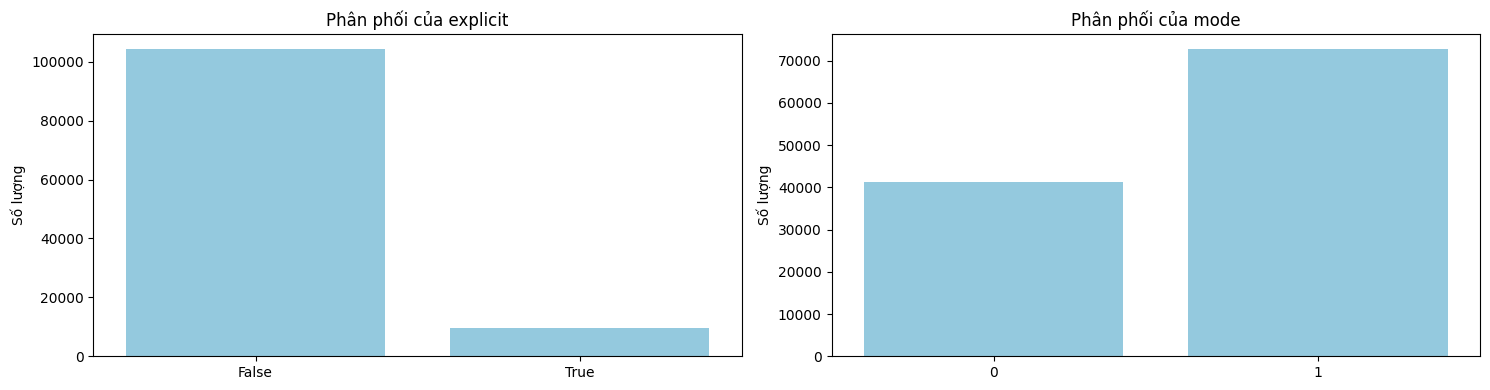

In [14]:
# Tính toán kích thước lưới biểu đồ
bin_plots = len(binary_cols)
bin_cols = 2  # Số biểu đồ trên 1 hàng
bin_rows = math.ceil(bin_plots / bin_cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(bin_rows, bin_cols, figsize=(15, 4 * bin_rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    unique_values = df[col].value_counts().sort_index()  # Sắp theo thứ tự ordinal
    sns.barplot(y=unique_values.values, x=unique_values.index, ax=axes[i], color='skyblue')
    
    
    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Nhận xét:**
    - Thuộc tính `explicit`: Dữ liệu thể hiện sự mất cân bằng lớp nghiêm trọng. Nhóm nội dung không dán nhãn nhạy cảm chiếm tỷ trọng áp đảo (vượt mốc 100000 mẫu). Trong khi đó, nhóm có nội dung nhạy cảm là lớp thiểu số với số lượng rất thấp (khoảng dưới 10000 mẫu).
    - Thuộc tính `mode`: Dữ liệu có phân phối nhị phân với mức độ chênh lệch vừa phải. Giá trị 1 là nhóm chiếm ưu thế.

## **Phân tích dữ liệu bị thiếu**

### **Thống kê giá trị thiếu**

In [15]:
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Percentage (%)': missing_percent
})

print("="*10 + "Thống kê dữ liệu thiếu" + "="*10)
display(missing_df[missing_df['Missing Count'] > 0])

==========Thống kê dữ liệu thiếu==========


,Missing Count,Percentage (%)
artists,1,0.000877
album_name,1,0.000877
track_name,1,0.000877


### **Trực quan hóa**

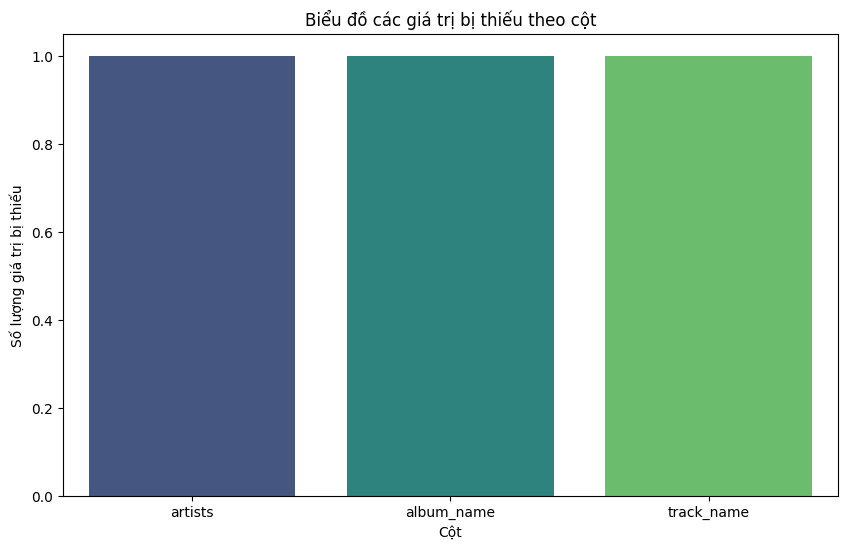

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df[missing_df['Missing Count'] > 0].index,
            y=missing_df[missing_df['Missing Count'] > 0]['Missing Count'], 
            hue=missing_df[missing_df['Missing Count'] > 0].index,
            palette='viridis')
plt.title('Biểu đồ các giá trị bị thiếu theo cột')
plt.xlabel('Cột')
plt.ylabel('Số lượng giá trị bị thiếu')
plt.show()

- **Nhận xét:**
    - Chỉ có 3 thuộc tính bị thiếu dữ liệu và số lượng chỉ là 1 mẫu quan sát.

### **Kiểm tra chi tiết**

In [17]:
row_missing = df[df.isnull().any(axis=1)]
display(row_missing)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### **Kết luận & Giải pháp**

- **Quan sát:** Dữ liệu chỉ thiếu duy nhất 1 dòng tại các cột artists, album_name, track_name.
- **Nguyên nhân:** Có thể do lỗi trong quá trình thu thập dữ liệu hoặc bài hát đó bị gỡ khỏi hệ thống.
- **Giải pháp:** Vì tỷ lệ thiếu cực nhỏ ($1/114000 \approx 0\%$) và không ảnh hưởng đến tổng thể nên sẽ xóa bỏ dòng này trong bước Tiền xử lý.